In [132]:
from pyspark.sql.functions import randn, rand, sum, col, round
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
df18v1 = spark.read.csv('data/pluto_18v1.csv', header=True)
df18v11 = spark.read.csv('data/pluto_18v11.csv', header=True)
df18v2 = spark.read.csv('data/pluto_18v2.csv', header=True)
df17v11 = spark.read.csv('data/pluto_17v11.csv', header=True)

convert column names all to lower case

In [134]:
df18v1 = df18v1.select([col(A).alias(A.lower()) for A in df18v1.schema.names])
df18v11 = df18v11.select([col(A).alias(A.lower()) for A in df18v11.schema.names])
df18v2 = df18v2.select([col(A).alias(A.lower()) for A in df18v2.schema.names])
df17v11 = df17v11.select([col(A).alias(A.lower()) for A in df17v11.schema.names])

In [135]:
cols = df18v1.columns

In [136]:
df18v1 = df18v1.select(cols)
df18v11 = df18v11.select(cols)
df18v2 = df18v2.select(cols)
df17v11 = df17v11.select(cols)

In [137]:
df =df18v1.union(df18v2).union(df17v11).union(df18v11)

In [157]:
start_time = time.time()
summary = df.groupBy("version").agg(sum("unitsres"),
                                    sum("lotarea"),
                                    sum("bldgarea"),
                                    sum("comarea"),
                                    sum("resarea"),
                                    sum("officearea"),
                                    sum("retailarea"),
                                    sum("garagearea"),
                                    sum("strgearea"),
                                    sum("factryarea"),
                                    sum("otherarea"),
                                    sum("assessland"),
                                    sum("assesstot"),
                                    sum("exemptland"),
                                    sum("exempttot"),
                                    sum("firm07_flag"),
                                    sum("pfirm15_flag"),
                                   sum(col("lotarea")*col("builtfar")),
                                   sum(col("lotarea")*col("residfar")),
                                   sum(col("lotarea")*col("commfar")),
                                   sum(col("lotarea")*col("facilfar"))).toPandas()
elapsed_time = time.time() - start_time

In [158]:
elapsed_time

24.595906019210815

In [159]:
agg_cols = ['version','UnitsRes','LotArea','BldgArea','ComArea',
 'ResArea','OfficeArea','RetailArea','GarageArea',
 'StrgeArea','FactryArea','OtherArea','AssessLand',
 'AssessTot','ExemptLand','ExemptTot','FIRM07_FLAG',
 'PFIRM15_FLAG','LotAreaXBuiltFAR', 'LotAreaXResidFAR',
'LotAreaXCommFAR', 'LotAreaXFacilFAR']

In [160]:
summary.columns = agg_cols

In [161]:
# summaryMN = summary[summary.Borough == 'MN']
# summarySI = summary[summary.Borough == 'SI']
# summaryBK = summary[summary.Borough == 'BK']
# summaryBX = summary[summary.Borough == 'BX']
# summaryQN = summary[summary.Borough == 'QN']
summary.index = summary.version

In [163]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
version,,,,,,,,,,,,,,,,,,,,,
17v1.1,17v1.1,3535776.0,6.813541e+09,5.464293e+09,1.815464e+09,3.449799e+09,649838284.0,276187004.0,122093670.0,104659836.0,...,9.822458e+10,3.846283e+11,4.492449e+10,1.478786e+11,34569.0,65628.0,5.446584e+09,6.685347e+09,2.863380e+09,1.216741e+10
18v2,18v2,3572158.0,6.494762e+09,5.423755e+09,1.632128e+09,3.132005e+09,559981100.0,237699967.0,102022869.0,92064011.0,...,9.784966e+10,3.936764e+11,4.458468e+10,1.446464e+11,39996.0,53129.0,5.421707e+09,6.097803e+09,2.415770e+09,1.139431e+10
18V1.1,18V1.1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,...,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0,5.448441e+09,6.733094e+09,2.970381e+09,1.247463e+10
18V1,18V1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,...,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0,5.448441e+09,6.733104e+09,2.865011e+09,1.219444e+10


In [108]:
# sMN = summaryMN.iloc[:, 2:].pct_change()
# sSI = summarySI.iloc[:, 2:].pct_change()
# sQN = summaryQN.iloc[:, 2:].pct_change()
# sBK = summaryBK.iloc[:, 2:].pct_change()
# sBX = summaryBX.iloc[:, 2:].pct_change()

In [107]:
# sMN

,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.001973,0.08514,0.015681,0.185582,0.24902,0.196857,0.333721,0.299546,0.191683,0.085712,...,-0.000116,0.005217,-0.012077,-0.017188,-0.184796,-0.155194,0.006836,0.195783,0.301331,0.186097


In [169]:
summary = summary.reindex(['18v2', '18V1.1', '18V1', '17v1.1'])

In [170]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
version,,,,,,,,,,,,,,,,,,,,,
18v2,18v2,3572158.0,6.494762e+09,5.423755e+09,1.632128e+09,3.132005e+09,559981100.0,237699967.0,102022869.0,92064011.0,...,9.784966e+10,3.936764e+11,4.458468e+10,1.446464e+11,39996.0,53129.0,5.421707e+09,6.097803e+09,2.415770e+09,1.139431e+10
18V1.1,18V1.1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,...,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0,5.448441e+09,6.733094e+09,2.970381e+09,1.247463e+10
18V1,18V1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,...,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0,5.448441e+09,6.733104e+09,2.865011e+09,1.219444e+10
17v1.1,17v1.1,3535776.0,6.813541e+09,5.464293e+09,1.815464e+09,3.449799e+09,649838284.0,276187004.0,122093670.0,104659836.0,...,9.822458e+10,3.846283e+11,4.492449e+10,1.478786e+11,34569.0,65628.0,5.446584e+09,6.685347e+09,2.863380e+09,1.216741e+10


In [171]:
summary_pct = summary.iloc[:, 1:].pct_change()

In [172]:
summary_pct

,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
version,,,,,,,,,,,,,,,,,,,,,
18v2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18V1.1,-0.004559,0.049431,0.011249,0.112832,0.107982,0.166054,0.162763,0.199791,0.110782,0.013758,...,-0.000516,0.004865,-0.009923,-0.016860,-0.135864,0.235069,4.931019e-03,0.104184,0.229580,0.094813
18V1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.332268e-15,0.000001,-0.035474,-0.022461
17v1.1,-0.005651,-0.000332,-0.003733,-0.000452,-0.005880,-0.004794,-0.000730,-0.002552,0.023438,-0.006280,...,0.004350,-0.027714,0.017720,0.039878,0.000203,0.000152,-3.409097e-04,-0.007093,-0.000569,-0.002216


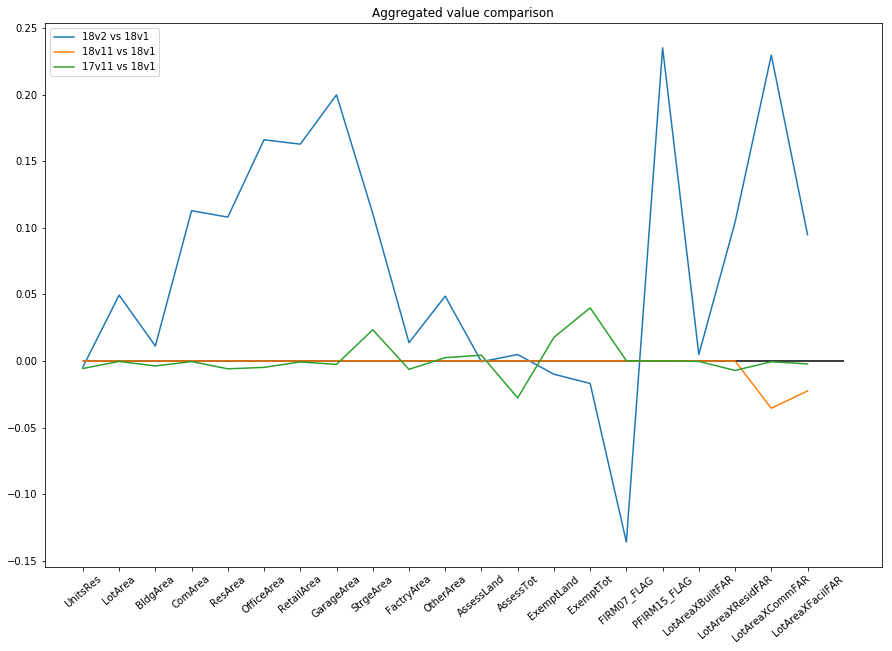

In [176]:
plt.figure(figsize=(15, 10))
# plt.plot(range(21), sMN.iloc[1, :], label='MN')
# plt.plot(range(21), sSI.iloc[1, :], label='SI')
# plt.plot(range(21), sBK.iloc[1, :], label='BK')
# plt.plot(range(21), sBX.iloc[1, :], label='BX')
# plt.plot(range(21), sQN.iloc[1, :], label='QN')
plt.plot(range(21), summary_pct.iloc[1, :], label='18v2 vs 18v1')
plt.plot(range(21), summary_pct.iloc[2, :], label='18v11 vs 18v1')
plt.plot(range(21), summary_pct.iloc[3, :], label='17v11 vs 18v1')
plt.hlines(0, 0, 21, color = 'black')
plt.xticks(range(21), summary_pct.columns, rotation=40)
plt.title('Aggregated value comparison')
plt.legend()
plt.show()

In [114]:
sc

<SparkContext master=local[*] appName=PySparkShell>